# Classification using Decision Tree

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree

In [2]:
df = pd.read_csv("input.csv")
df.head()

,ID,Age,Income,Student,Credit Rating,Buy Car
0,1,Young,High,No,Fair,No
1,2,Young,High,No,Good,No
2,3,Middle,High,No,Fair,Yes
3,4,Old,Medium,No,Fair,Yes
4,5,Old,Low,Yes,Fair,Yes


### Converting to numerical data

In [6]:
age = df['Age'].factorize();
income = df['Income'].factorize();
student = df['Student'].factorize();
credit_rating = df['Credit Rating'].factorize();
buy_car = df['Buy Car'].factorize();

In [17]:
factorized_data = {'Age':age[0], 'Income':income[0], 'Student':student[0], 'Credit Rating':credit_rating[0], 'Buy Car':buy_car[0]}

df1 = pd.DataFrame(factorized_data)
df1.head()

,Age,Income,Student,Credit Rating,Buy Car
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1


### Dividing the data into training set and testing set

In [18]:
X = df1[['Age','Income','Student','Credit Rating']]
y = df1['Buy Car']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(11, 4)
(11,)
(3, 4)
(3,)


### Training Classifier

In [31]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=1)

In [32]:
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

prediction

array([1, 0, 1])

### Testing our classifier

In [41]:
from sklearn import metrics
print("Accuracy = {}%".format(metrics.accuracy_score(y_test,prediction) * 100))

Accuracy = 100.0%


### Finding root node

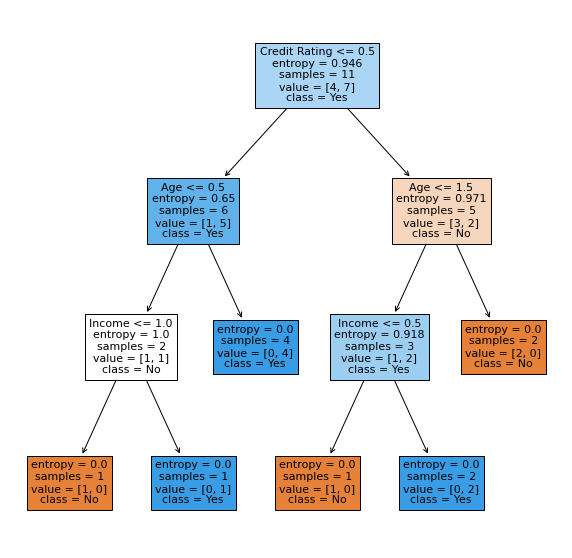

In [40]:
import matplotlib.pyplot as plt

fn=['Age','Income','Student','Credit Rating']
cn=['No', 'Yes']

plt.figure(figsize = (10,10))

tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
